<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/Caminata_aleatoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:blue;">**CAMINATA ALEATORIA 1D**</span>
 <span style="color:purple;"></span>

Una caminata aleatoria unidimensional es un proceso estocástico donde una partícula se mueve en línea recta , dando pasos discretos.En cada paso:


*   Se mueve a la derecha con probabilidad $p$
*   Se mueve a la izquierda con probabilidad $q=1-p$ (esta expresión esta dada por *$p+q=1$*




<span style="color:purple;">**Ejercicio**</span>
Escribir un còdigo que implemente  una caminata aleatoria 1D, con probabilidad $p$, de moverse a la izquierda ,tal que $p+q=1$.

In [ ]:
import random  #esta libreria genera numeros aleatorios
import matplotlib.pyplot as plt #lIBREIA PARA LA GRAFICA

Definimos los parametros
* $p$=probalidad esta se encuentra entre $0-1$
* $N$= numero de pasos


In [ ]:
def caminata (p):
  x=[0] #creamos una lista vacia para guardar los valores,donde x =Pocisiones
  for _ in range(100):
    r=random.random() #generamos un numero aleatorio entre 0 y 1
    if r<p: #esto nos indica el moviemiento de la particula
      n_p=x[-1]+1  #indica el movimiento a la derecha
    else:
      n_p=x[-1]-1 #indica el movimento a la izquierda
    x.append(n_p)
  return x

Graficamos la simulación de una caminata unidimensional

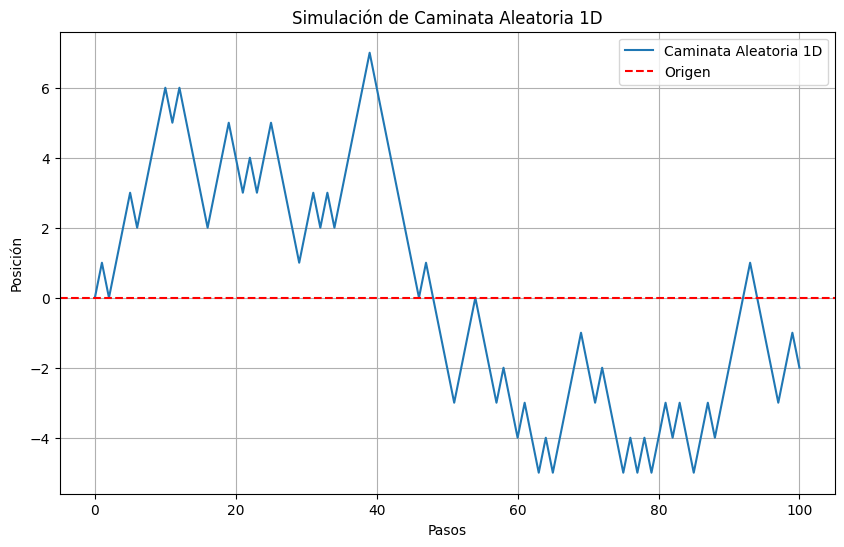

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6)) # Crea la figura y los ejes antes de plotear
ax.plot(caminata(0.5), label='Caminata Aleatoria 1D') # Añade una etiqueta para la leyenda
ax.axhline(y=0, color='red', linestyle='--', label='Origen') # Añade una etiqueta para la línea horizontal
ax.grid(True)
ax.legend() # La leyenda ahora mostrará las etiquetas
ax.set_title('Simulación de Caminata Aleatoria 1D') # Añade un título al gráfico
ax.set_xlabel('Pasos') # Etiqueta el eje X
ax.set_ylabel('Posición') # Etiqueta el eje Y
plt.show()

<span style="color:purple;">**¿Qué preguntas surgen?**</span>


*   guardar la lista ¿cuándo regresa al cero?
*   ¿maximo alejamiento? USAR EL VALOR ABSOLUTO Y PROBA DE REGRESAR AL ORIGEN
*   ¿Cuántas veces toco el origen?